In [14]:
#data more
import pandas as pd
from pathlib import Path
import os
data_augment = pd.read_csv("/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/notebooks/results_csv/augment_0_2_all_0_7_lound_speed.csv")
data_augment = data_augment.sample(frac=0.5, random_state=1).reset_index(drop=True)
augment_lound_speed = pd.read_csv("/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/notebooks/results_csv/augment_0_2_all_0_7_lound_speed_train_2k1hours.csv")
augment_lound_speed = augment_lound_speed.sample(frac=0.25, random_state=1).reset_index(drop=True)

data_medical = pd.read_csv("/mnt/driver/STT_data/STT_dataset/64.VietMed/metadata_normalize_final.csv")
data_clean = pd.read_csv("/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/notebooks/results_csv/2023_2024_origin_data_clean.csv")
data_tele_sale = pd.read_csv("/mnt/driver/STT_data/STT_dataset/62.Tele_extra_augment/metadata.csv")
data_augment_10_dir = pd.read_csv("/mnt/driver/pdnguyen/studen_annoted/csv/check_to_remove/augment_tele_10dir.csv")

data_augment_tele_add = pd.read_csv("/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/notebooks/results_csv/metadata_train_tele_them_7_5_2024.csv")

dir_62_tele = pd.read_csv("/mnt/driver/STT_data/STT_dataset/62.Tele_extra_augment/metadata.csv")

train_data = pd.concat([data_augment,augment_lound_speed,data_medical,data_clean,data_tele_sale,data_augment_10_dir,data_augment_tele_add,dir_62_tele])

total_time_minutes = train_data['duration'].sum()
print(total_time_minutes/3600)

2591.4794978243635


In [15]:
train_data_exists = train_data[train_data['file'].apply(os.path.exists)]

In [16]:

train_data_exists.to_csv('/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/notebooks/results_csv/demo_2.csv', index=False, encoding='utf-8')

In [ ]:
columns_to_save =columns_to_save =  ["file", "text", "duration"]
train_data = train_data.sample(frac=1,random_state=1).reset_index(drop=True)
train_data.to_csv('/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/notebooks/results_csv/augment_0_2_all_0_7_lound_speed_train_2k1hours.csv', columns=columns_to_save, index=False, encoding='utf-8')

In [ ]:
# columns_to_save = ["file", "text", "duration"]
# total_data_train.to_csv('/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/notebooks/results_csv/train_2023_2024.csv', columns=columns_to_save, index=False, encoding='utf-8')
# total_data_val.to_csv('/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/notebooks/results_csv/val_2023_2024.csv', columns=columns_to_save, index=False, encoding='utf-8')

# Check Telesale Augment

In [ ]:
import pandas as pd
from pathlib import Path
import os

In [ ]:
# folder_path = "/mnt/driver/STT_data/STT_dataset/62.Tele_extra_augment"

# data_frames = []

# for root, dirs, files in os.walk(folder_path):
#     for file in files:
#         if file.endswith(".csv"):
#             file_path = os.path.join(root, file)
#             try:
#                 df = pd.read_csv(file_path)
#                 data_frames.append(df)
#             except Exception as e:
#                 print(f"Không thể đọc file {file_path}: {e}")

# combined_data = pd.concat(data_frames, ignore_index=True)
# print(combined_data.shape)

combined_data = pd.read_csv("/home/lmnguyen/lmnguyen-stt/datasets/telesale/data.csv")

In [ ]:
combined_data["path"] = combined_data["path"].apply(lambda x: x.replace("/home/ndanh/STT_dataset","/mnt/driver/STT_data/STT_dataset"))

In [ ]:
filtered_data_62 = combined_data[combined_data["path"].str.contains("62.Tele_extra_augment")]

filtered_data_62.to_csv("/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/filtered_data_62.csv", index=False)

In [ ]:
def get_wav(path_folder):
    arr_wav = []
    for root, dirs, files in os.walk(path_folder):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                arr_wav.append(file_path)
    return arr_wav

In [ ]:
folder_wav_62 = "/home/lmnguyen/lmnguyen-stt/datasets/telesale"
arr_62 = get_wav(folder_wav_62)
print(len(arr_62))


In [ ]:
arr_62_set = set(arr_62)

rows_in_arr_62 = filtered_data_62[filtered_data_62["file"].isin(arr_62_set)]

files_not_in_filtered_data_62 = [file for file in arr_62 if file not in set(filtered_data_62["file"])]

In [ ]:
print(rows_in_arr_62.shape)
print(len(files_not_in_filtered_data_62))

In [ ]:
rows_in_arr_62.to_csv("/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/check_to_remove/file_da_train_62.csv", index=False)

files_not_in_filtered_data_62 = pd.DataFrame(files_not_in_filtered_data_62, columns=["file"])

files_not_in_filtered_data_62.to_csv("/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/check_to_remove/file_new_62.csv", index=False)


# Chia data vào từng folder

In [6]:
import pandas as pd
from pathlib import Path
import os
import shutil
from concurrent.futures import ThreadPoolExecutor
import tqdm
from pathlib import Path
from pydub import AudioSegment
from pydub.utils import mediainfo

In [7]:
data_move = pd.read_csv("/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/check_to_remove/file_new_10.csv")
print(data_move.shape)

(37281, 1)


In [7]:
def copy_file(file_path, destination_folder):
    try:
        # Tạo đường dẫn đầy đủ tới file đích
        dest_path = os.path.join(destination_folder, os.path.basename(file_path))
        # Sao chép file
        shutil.copy2(file_path, dest_path)
    except Exception as e:
        print("lỗi lòi le")

def convert_to_mono_and_resample(input_file, output_file, target_sample_rate=16000):
    audio = AudioSegment.from_file(input_file)
    info = mediainfo(input_file)
    channels = int(info['channels'])
    sample_rate = int(info['sample_rate'])
    if channels != 1:
        audio = audio.set_channels(1)
    if sample_rate != target_sample_rate:
        audio = audio.set_frame_rate(target_sample_rate)
    audio.export(output_file, format="wav")

In [11]:
import pandas as pd
from pathlib import Path
import os
import shutil
from concurrent.futures import ThreadPoolExecutor
import tqdm

# Đọc file CSV
data_move = pd.read_csv("/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/check_to_remove/file_new_29.csv")
print(data_move.shape)

# Đường dẫn tới thư mục đích
out_put_dir = "/mnt/driver/pdnguyen/studen_annoted/data_telesale_extract_29_dir"
for index,file in tqdm.tqdm(enumerate(data_move["file"])):
    if index % 6000 == 0:
        out_folder = f"{out_put_dir}/extra_{index}/wavs"
        if not os.path.exists(out_folder):
            os.makedirs(out_folder)
    path_wav_output = f"{out_folder}/{index}.wav"
    convert_to_mono_and_resample(file,path_wav_output)


(98, 1)


98it [00:06, 14.59it/s]


In [10]:
import pandas as pd
from pathlib import Path
import os
import shutil
from concurrent.futures import ThreadPoolExecutor
import tqdm

# Đọc file CSV
data_move = pd.read_csv("/mnt/driver/pdnguyen/studen_annoted/csv/check_to_remove/file_new_20.csv")
print(f"Kích thước ban đầu: {data_move.shape}")

# Lọc các hàng không chứa từ "_split_" trong cột "file"
data_move_filtered = data_move[~data_move["file"].str.contains("_split_")]
print(f"Kích thước sau khi lọc: {data_move_filtered.shape}")


output_dir = "/mnt/driver/pdnguyen/studen_annoted/data_telesale_extract_20_dir"

for index,file in tqdm.tqdm(enumerate(data_move_filtered["file"])):
    if index % 6000 == 0:
        out_folder = f"{output_dir}/extra_{index}/wavs"
        if not os.path.exists(out_folder):
            os.makedirs(out_folder)
    path_wav_output = f"{out_folder}/{index}.wav"
    convert_to_mono_and_resample(file,path_wav_output)

Kích thước ban đầu: (31147, 1)
Kích thước sau khi lọc: (4403, 1)


4403it [04:23, 16.70it/s]


# Phan tich Duration data

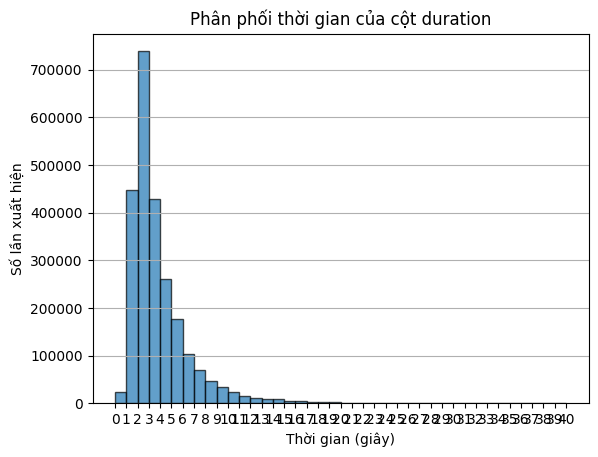

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_duration_distribution(csv_file):
    # Bước 1: Đọc file CSV
    df = pd.read_csv(csv_file)
    
    # Bước 2: Lấy cột `duration`
    duration = df['duration']
    
    # Bước 3: Định nghĩa các bin (các khoảng thời gian) 0-1(s), 1-2(s),...
    bins = [i for i in range(0, int(duration.max()) + 2)]  # Tạo các khoảng từ 0 đến max(duration) + 1
    
    # Bước 4: Vẽ biểu đồ phân phối
    plt.hist(duration, bins=bins, edgecolor='black', alpha=0.7)
    
    # Bước 5: Thêm tiêu đề và nhãn
    plt.title('Phân phối thời gian của cột duration')
    plt.xlabel('Thời gian (giây)')
    plt.ylabel('Số lần xuất hiện')
    
    # Bước 6: Hiển thị biểu đồ
    plt.xticks(bins)  # Hiển thị các giá trị bin trên trục x
    plt.grid(axis='y')  # Thêm grid cho trục y
    plt.show()

# Đường dẫn tới file CSV
csv_file = '/home/pdnguyen/fast_confomer_finetun/finetune-fast-conformer/notebooks/results_csv/20_aug57_10aug_64_total_origin_data_concatSTT.csv'

# Gọi hàm để vẽ biểu đồ phân phối thời gian của cột `duration`
plot_duration_distribution(csv_file)
